In [12]:
import torch
print(torch.__version__)


1.13.1+cpu


In [13]:
import cv2
print(cv2.__version__)


4.10.0


In [1]:
import torch

C:\Users\user\anaconda3\envs\myenv\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import time
import base64
from PIL import Image
from io import BytesIO
from openai import OpenAI  # Ensure openai==1.2.0 is installed
import torch  # Import PyTorch for tensor operations

In [3]:
# Initialize Solar Pro API client for the solar-docvision model
client = OpenAI(
    api_key="up_8yOnBs8u8lSqPzUrYYQsVaDiZuYn5",  # Replace with your Solar Pro API key
    base_url="https://api.upstage.ai/v1/solar"
)

# Function to convert an image to base64 format
def image_to_base64(image_path):
    with open(image_path, "rb") as image_file:
        base64_image = base64.b64encode(image_file.read()).decode("utf-8")
    return base64_image

# Function to generate initial caption using solar-docvision model
def generate_caption_with_solar_docvision(image_path):
    base64_image = image_to_base64(image_path)
    
    # Make a request to the solar-docvision API
    response = client.chat.completions.create(
        model="solar-docvision",
        messages=[
            {
                "role": "user",
                "content": [
                    {
                        "type": "image_url",
                        "image_url": {
                            "url": f"data:image/jpeg;base64,{base64_image}"
                        },
                    },
                    {
                        "type": "text",
                        "text": "Can you generate a caption?"  # Question for the model
                    },
                ]
            }
        ],
    )
    
    caption = response.choices[0].message.content
    return caption

In [4]:
# Function to display the image with captions
def display_image_with_caption(image, caption):
    plt.imshow(image)
    plt.title(f"Caption: {caption}", fontsize=10)
    plt.axis('off')
    plt.show()

# Edge Detection using Sobel Operator
def detect_edges(image):
    gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    
    # Apply Gaussian blur to reduce noise
    blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

    # Convert to tensor
    image_tensor = torch.tensor(blurred_image, dtype=torch.float32).unsqueeze(0).unsqueeze(0)

    # Sobel filters for edge detection
    sobel_kernel_x = torch.tensor([[[[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]]], dtype=torch.float32)
    sobel_kernel_y = torch.tensor([[[[-1, -2, -1], [0, 0, 0], [1, 2, 1]]]], dtype=torch.float32)

    sobel_x = torch.nn.functional.conv2d(image_tensor, sobel_kernel_x, padding=1)
    sobel_y = torch.nn.functional.conv2d(image_tensor, sobel_kernel_y, padding=1)

    sobel_magnitude = torch.sqrt(sobel_x ** 2 + sobel_y ** 2).squeeze().numpy()

    # Normalize sobel_magnitude to [0, 1]
    max_value = sobel_magnitude.max()
    if max_value > 0:
        sobel_magnitude /= max_value
    else:
        sobel_magnitude = np.zeros_like(sobel_magnitude)

    return sobel_magnitude


In [5]:
# RMSE Calculation
def compute_rmse(image1, image2):
    return np.sqrt(np.mean((image1 - image2) ** 2))

# Comparison Function using RMSE
def compare_images_rmse(image1, image2, rmse_threshold=0.0440):
    edge_image1 = detect_edges(image1)
    edge_image2 = detect_edges(image2)

    # Resize to ensure same dimensions
    edge_image1 = cv2.resize(edge_image1, (224, 224))
    edge_image2 = cv2.resize(edge_image2, (224, 224))

    # Compute RMSE
    rmse_score = compute_rmse(edge_image1, edge_image2)
    print(f"RMSE: {rmse_score:.4f}")

    if rmse_score > rmse_threshold:
        return True, rmse_score  # Return True when big difference is detected
    else:
        return False, rmse_score  # Return False when small difference is detected


Frames per second: 30.0
RMSE: 0.0134
RMSE: 0.0149
RMSE: 0.0111
RMSE: 0.0041
RMSE: 0.0050
RMSE: 0.0038
RMSE: 0.0042
RMSE: 0.0034
RMSE: 0.0048
RMSE: 0.0040
RMSE: 0.0072
RMSE: 0.0062
RMSE: 0.0052
RMSE: 0.0348
Big Difference Detected. RMSE: 0.0348
Caption:  A person is lying down on the floor.




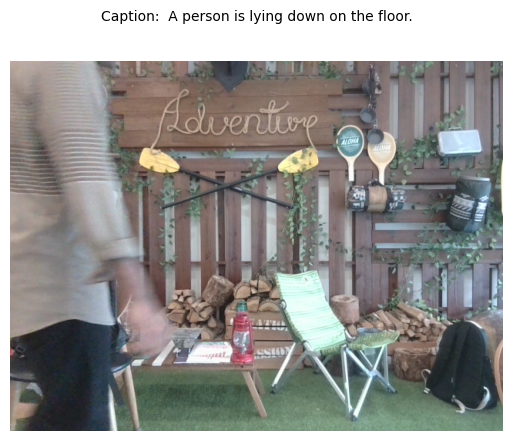

RMSE: 0.0487
Big Difference Detected. RMSE: 0.0487
Caption:  The caption for this image could be: "A dynamic duo in action at the 'Adventure Park', showcasing a blend of concentration and agility as they navigate the challenging obstacle course." This caption encapsulates the essence of the activity, highlights the key elements of the scene, and conveys the energy and atmosphere of the moment captured in the photograph.




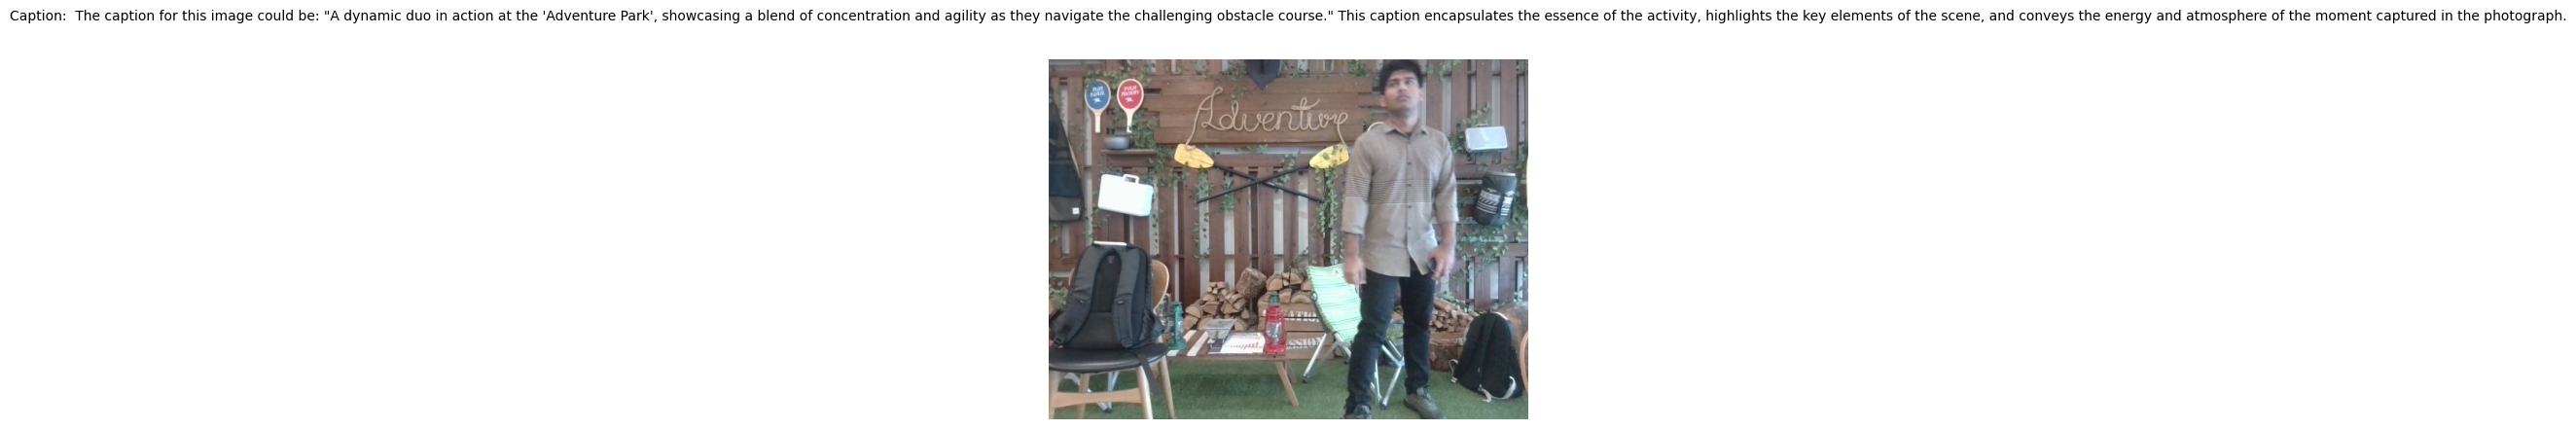

RMSE: 0.0820
Big Difference Detected. RMSE: 0.0820
Caption:  A blurry image of a lady sitting in front of a keyboard.




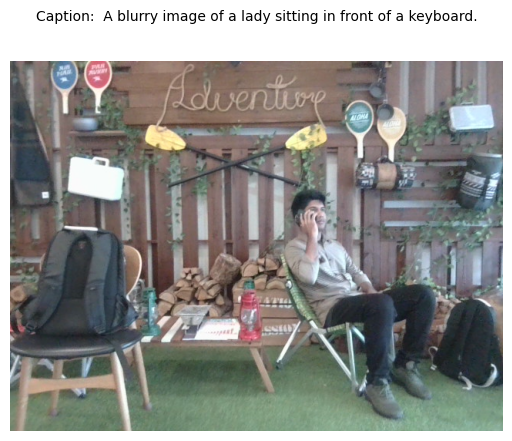

RMSE: 0.0801
Big Difference Detected. RMSE: 0.0801
Caption:  A black and white photo of a woman on a trampoline.




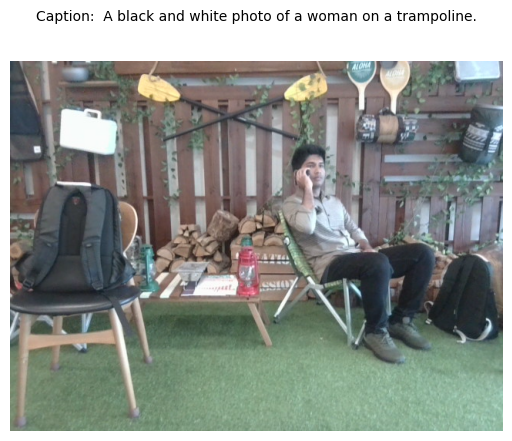

RMSE: 0.0720
Big Difference Detected. RMSE: 0.0720
Caption:  A young woman sits in a chair in front of a computer.




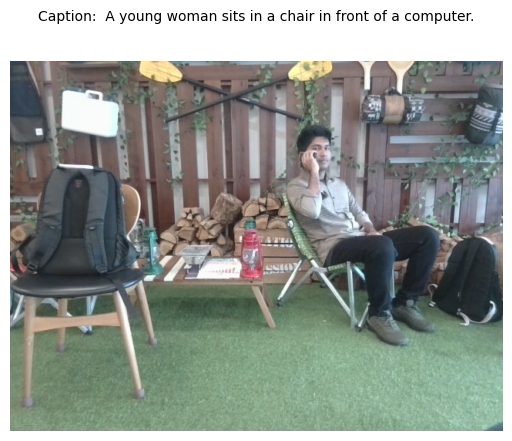

RMSE: 0.0483
Big Difference Detected. RMSE: 0.0483
Caption:  A man sitting in a chair looking at a computer screen




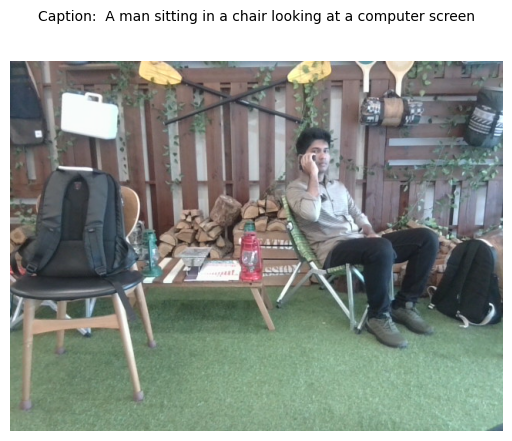

RMSE: 0.0636
Big Difference Detected. RMSE: 0.0636
Caption:  The caption for this image could be: "A moment of reflection amidst the organized chaos of a modern nomad's temporary sanctuary." This caption encapsulates the man's pensive expression and the surrounding environment that suggests a transient lifestyle, possibly that of a traveler or a digital nomad. It also highlights the juxtaposition of being in a green, natural-feeling space with the practicality of a temporary living arrangement.




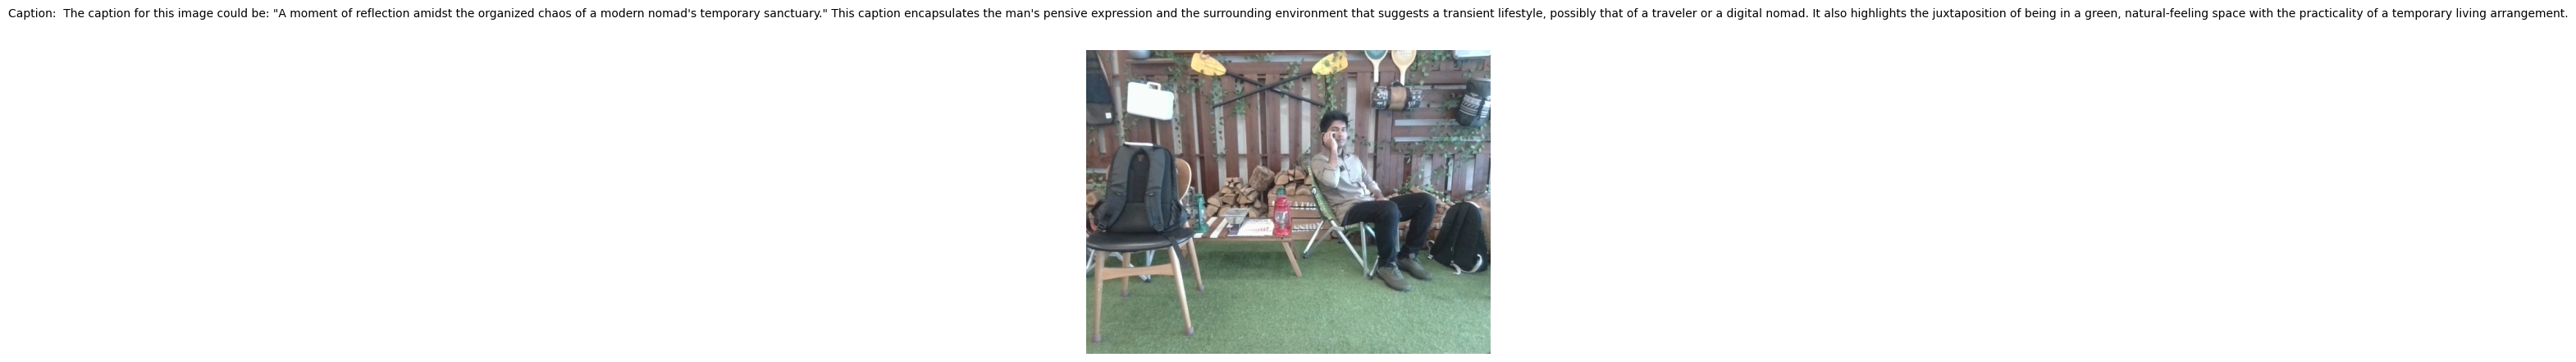

RMSE: 0.0334
Big Difference Detected. RMSE: 0.0334
Caption:  A person on a stationary bike in a room




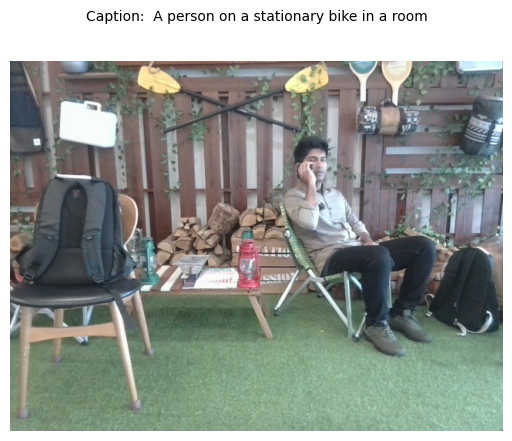

RMSE: 0.0674
Big Difference Detected. RMSE: 0.0674
Caption:  A woman riding a bicycle




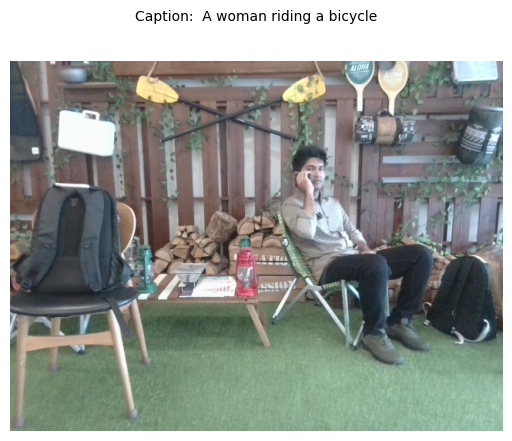

RMSE: 0.0703
Big Difference Detected. RMSE: 0.0703
Caption:  The illusion of a girl floating above her bed.




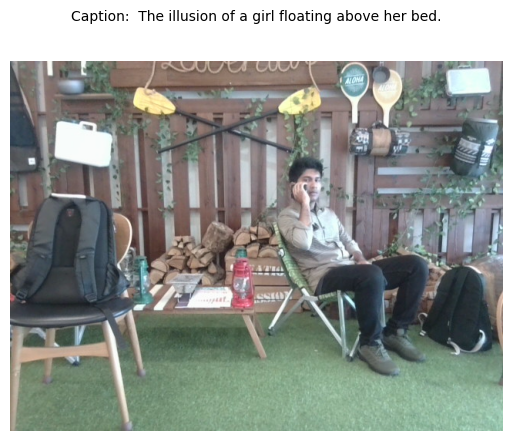

RMSE: 0.0064
RMSE: 0.0038
RMSE: 0.0053
RMSE: 0.0042
RMSE: 0.0041
RMSE: 0.0045
RMSE: 0.0048
RMSE: 0.0053
RMSE: 0.0036
RMSE: 0.0078
RMSE: 0.0235
RMSE: 0.0234
RMSE: 0.0288
RMSE: 0.0354
Big Difference Detected. RMSE: 0.0354
Caption:  A man walking across a room carrying a bag




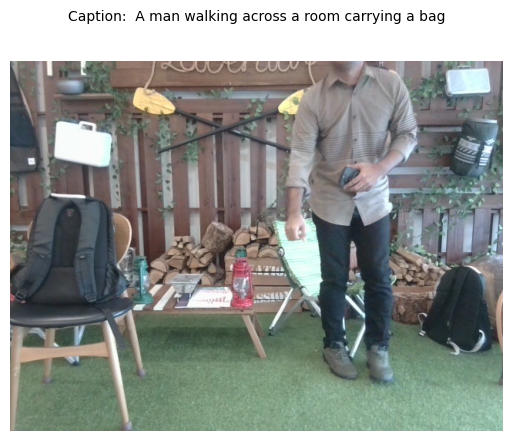

RMSE: 0.0406
Big Difference Detected. RMSE: 0.0406
Caption:  One man with a paddle looking at another man with a paddle




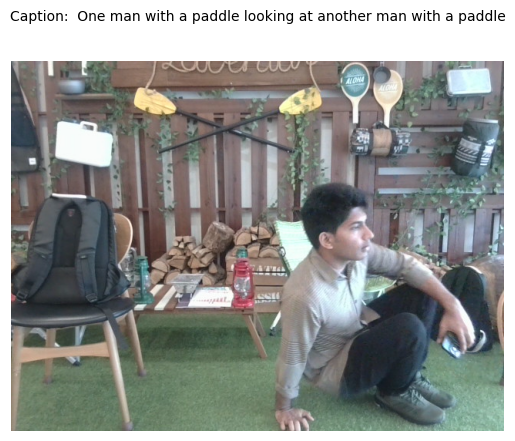

RMSE: 0.0385
Big Difference Detected. RMSE: 0.0385
Caption:  A man is sitting in front of a computer.




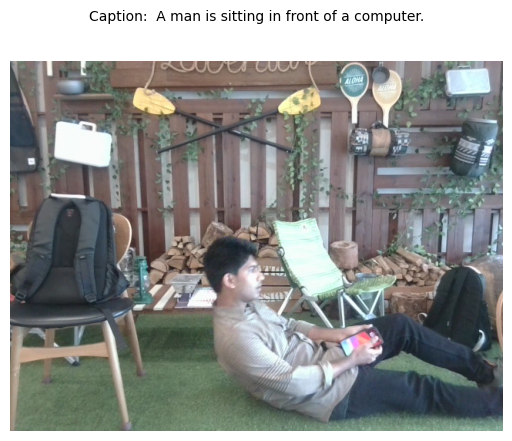

RMSE: 0.0357
Big Difference Detected. RMSE: 0.0357
Caption:  A woman is hanging upside down.




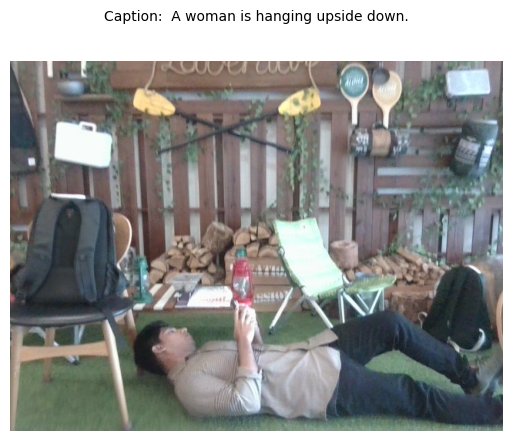

RMSE: 0.0263
RMSE: 0.0287
RMSE: 0.0338
Big Difference Detected. RMSE: 0.0338
Caption:  A man sitting on the floor in a room holding a book.




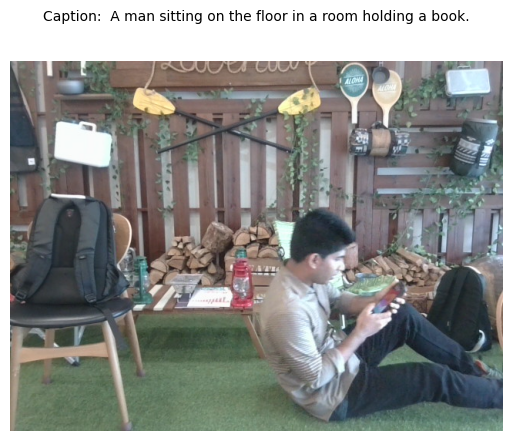

RMSE: 0.0337
Big Difference Detected. RMSE: 0.0337
Caption:  A woman sitting at a piano




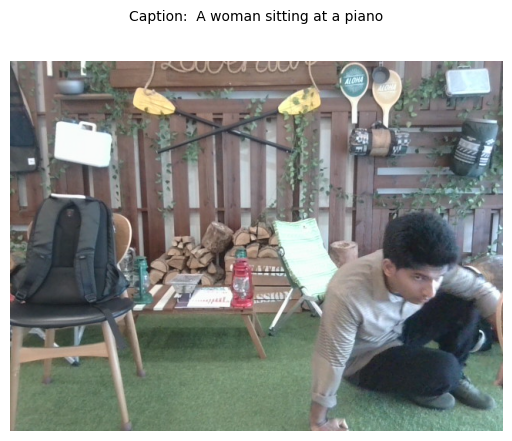

RMSE: 0.0286
RMSE: 0.0035
RMSE: 0.0063
RMSE: 0.0258
RMSE: 0.0360
Big Difference Detected. RMSE: 0.0360
Caption:  A man in a light colored shirt and dark pants standing on a table with his feet on the edge while holding a guitar




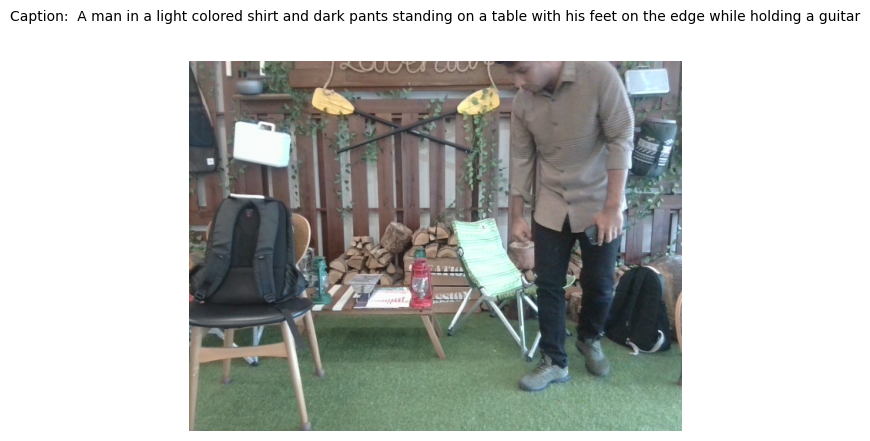

RMSE: 0.0388
Big Difference Detected. RMSE: 0.0388
Caption:  A young man sits in a folding chair in a wood paneled room.




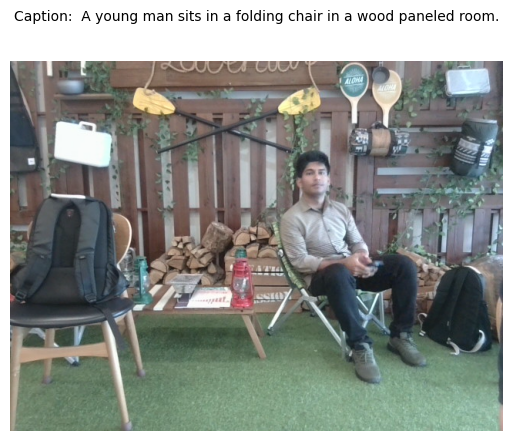

RMSE: 0.0159
RMSE: 0.0081
RMSE: 0.0117
RMSE: 0.0210
Processed 18 frames with big differences in 101.54 seconds.


In [11]:
# Frame capture from the webcam
def capture_from_camera(frame_rate=1, rmse_threshold=0.0300):
    start_time = time.time()
    video_capture = cv2.VideoCapture(0)  # Use 0 to capture from the default camera
    if not video_capture.isOpened():
        print("Error: Could not open camera.")
        return
    
    fps = video_capture.get(cv2.CAP_PROP_FPS)
    print(f"Frames per second: {fps}")
    interval = int(fps // frame_rate)

    frame_count = 0
    extracted_count = 0

    ret, prev_frame = video_capture.read()  # Capture the first frame

    while True:
        # Check for 'q' press first to exit before processing
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
        ret, frame = video_capture.read()
        if not ret:
            break
        
        if frame_count % interval == 0:
            # Compare frames using RMSE and generate caption only if big difference is found
            big_difference, rmse_score = compare_images_rmse(prev_frame, frame, rmse_threshold)
            
            if big_difference:
                print(f"Big Difference Detected. RMSE: {rmse_score:.4f}")
                
                # Save the frame with a big difference
                img_rgb = cv2.cvtColor(frame, cv2.COLOR_BGR2RGB)
                img_pil = Image.fromarray(img_rgb)
                img_pil.save(f'frame_{extracted_count:04d}.jpg')  # Save frame for captioning
                
                # Generate caption for the current frame
                image_path = f'frame_{extracted_count:04d}.jpg'
                caption = generate_caption_with_solar_docvision(image_path)
                print(f"Caption: {caption}")

                # Display the frame with the caption
                display_image_with_caption(img_rgb, caption)

                extracted_count += 1

            # Update the previous frame for the next comparisonp
            prev_frame = frame.copy()

        frame_count += 1

        # Show the frame in a window
        cv2.imshow("Camera Feed", frame)

    video_capture.release()
    cv2.destroyAllWindows()
    end_time = time.time()
    print(f"Processed {extracted_count} frames with big differences in {end_time - start_time:.2f} seconds.")

# Main execution: Capture frames from the camera
capture_from_camera(frame_rate=1)